In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')

In [4]:
from eboss_figs import (plot_nz, mollweide3maps, 
                        radec_zbins, kmean_jackknife, 
                        train_val_losses_256vs512, train_val_losses_allvsknown,
                       mollweide_templates)

In [5]:
fig_path = '/home/mehdi/data/eboss/figs/'

### n(z)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f97aefa0110>)

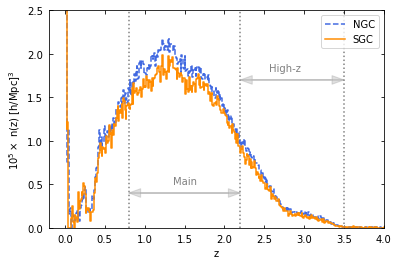

In [7]:
plot_nz(fig_path + 'eboss_data_nz.pdf')

### mollweide

column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:127: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens = ngal_tot / (frac_tot * area_1pix)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:127: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens = ngal_tot / (frac_tot * area_1pix)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:128: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens_f = ngal_tot_f / (frac_tot_f * area_1pix)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:128: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens_f = ngal_tot_f / (frac_tot_f * ar

(<Figure size 504x792 with 4 Axes>,
 (<matplotlib.axes._subplots.MollweideAxesSubplot at 0x7f977d85d310>,
  <matplotlib.axes._subplots.MollweideAxesSubplot at 0x7f97a2278a10>))

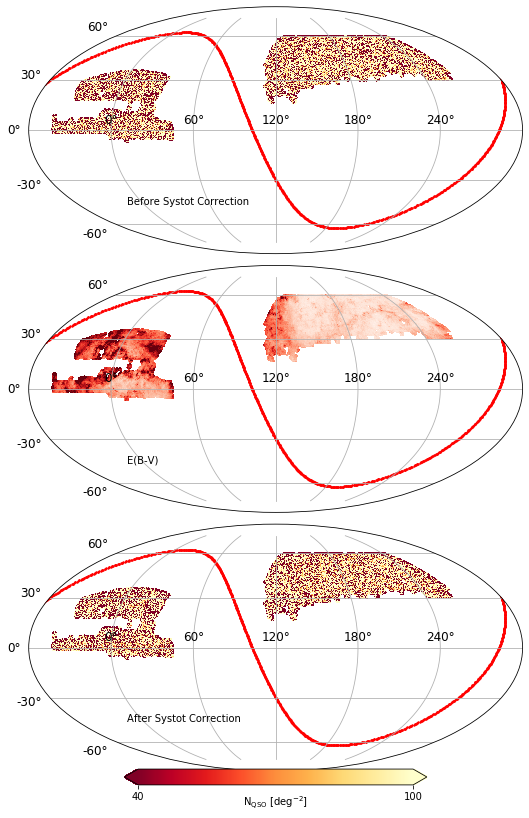

In [9]:
mollweide3maps(fig_path + 'eboss_data_mollweide3.pdf')

column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:210: RuntimeWarning: divide by zero encountered in true_divide
  ngalc = ngal / (frac*pixarea)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:210: RuntimeWarning: invalid value encountered in true_divide
  ngalc = ngal / (frac*pixarea)


(<Figure size 1296x576 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f97a02a6f90>,
       dtype=object))

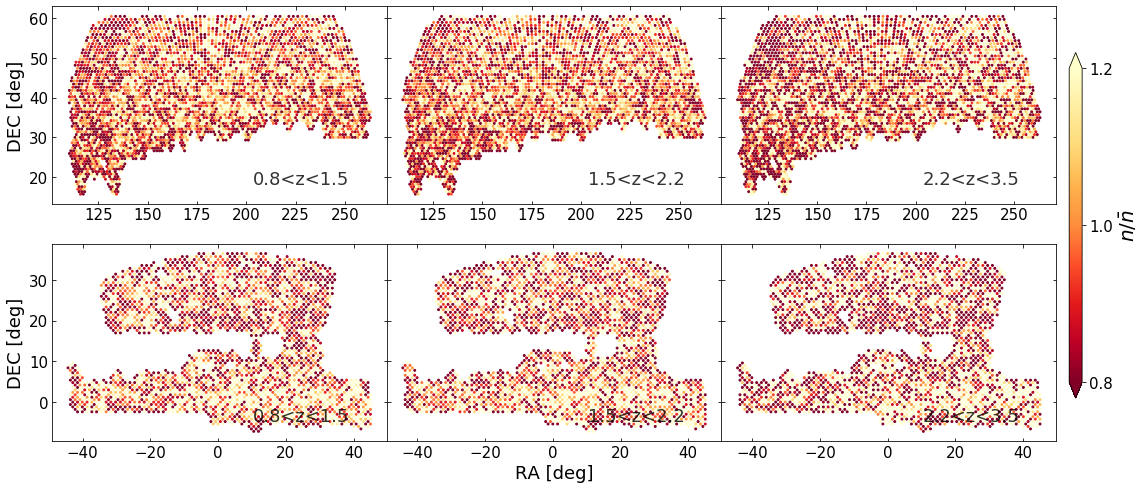

In [13]:
radec_zbins(fig_path + 'eboss_data_radeczbins.pdf')

column QSO_ID not in the randoms file
column IMATCH not in the randoms file


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff1e6440350>)

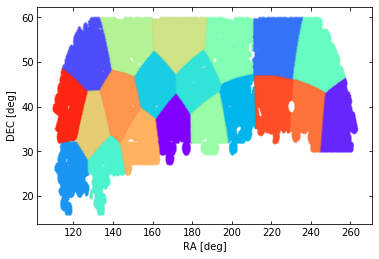

In [6]:
kmean_jackknife(fig_path + 'eboss_data_ngc_kmeansjackknife.pdf')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fc45fe310>)

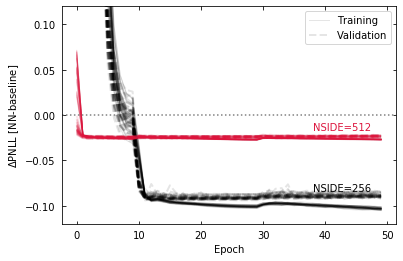

In [6]:
train_val_losses_256vs512(fig_path + 'eboss_data_ngc_trainval_losses_256vs512.pdf', nchains=10, npartitions=5, alpha=0.1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdea4792e90>)

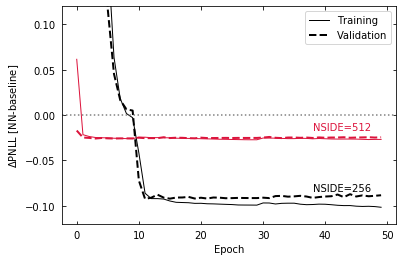

In [6]:
train_val_losses_256vs512(fig_path + 'eboss_data_ngc_trainval_losses_256vs512.pdf', nchains=1, npartitions=1, alpha=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fde8d11cfd0>)

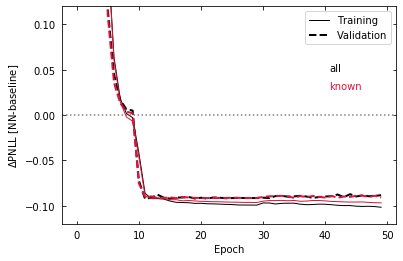

In [7]:
train_val_losses_allvsknown(fig_path + 'eboss_data_ngc_trainval_losses_allvsknown.pdf', nchains=1, npartitions=1, alpha=1)

(<Figure size 360x252 with 6 Axes>,
  <matplotlib.projections.geo.MollweideAxes at 0x7fa0a81ef990>])

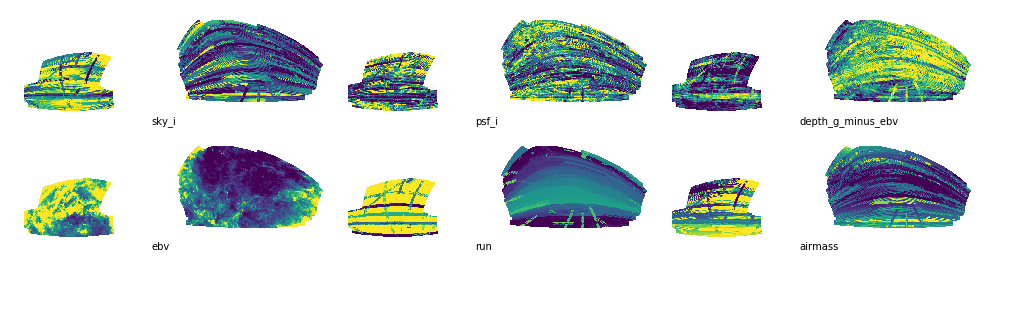

In [6]:
mollweide_templates(fig_path + 'eboss_data_templates.pdf')

In [4]:
import matplotlib.pyplot as plt
import fitsio as ft
import numpy as np
from scipy.stats import spearmanr, pearsonr

In [5]:
import LSSutils.utils as ut

In [6]:
dm = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/main/ngal_eboss_main_512.fits')
dh = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/highz/ngal_eboss_highz_512.fits')

In [10]:
def __pcc(xc, yc, kind='spearman'):
    if not kind in ['pearson', 'spearman']:
        raise ValueError(f'{kind} not defined')
    elif kind == 'pearson':
        func = pearsonr
    elif kind == 'spearman':
        func = spearmanr
        
    pcc = []
    for j in range(xc.shape[1]):
        pcc.append(func(xc[:,j], yc)[0])
    return pcc

def pcc(xc, yc, return_err=False, 
        num=100, kind='pearson', seed=42, 
        verbose=False):
   
    pcc_ = __pcc(xc, yc)
    ret = (pcc_, )
    
    if return_err:
        
        np.random.seed(42)
        pcc_err = []
        
        for _ in range(num):
            pcc_err.append(__pcc(xc, np.random.permutation(yc)))
            
            if verbose:print('.',end='')
        ret += (pcc_err, )
    
    return ret

In [29]:
pcc_m = pcc(dm['features'], dm['label'], num=100, return_err=True, verbose=True)
pcc_h = pcc(dh['features'], dh['label'], num=100, return_err=True, verbose=True)

........................................................................................................................................................................................................

[Text(0, 0, 'star_density'),
 Text(0, 0, 'ebv'),
 Text(0, 0, 'loghi'),
 Text(0, 0, 'sky_g'),
 Text(0, 0, 'sky_r'),
 Text(0, 0, 'sky_i'),
 Text(0, 0, 'sky_z'),
 Text(0, 0, 'depth_g_minus_ebv'),
 Text(0, 0, 'depth_r_minus_ebv'),
 Text(0, 0, 'depth_i_minus_ebv'),
 Text(0, 0, 'depth_z_minus_ebv'),
 Text(0, 0, 'psf_g'),
 Text(0, 0, 'psf_r'),
 Text(0, 0, 'psf_i'),
 Text(0, 0, 'psf_z'),
 Text(0, 0, 'run'),
 Text(0, 0, 'airmass')]

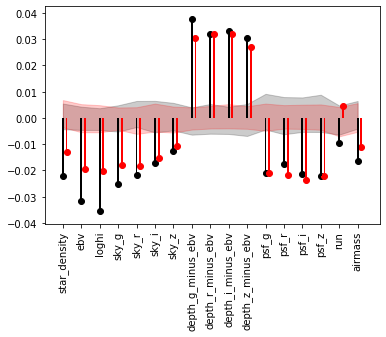

In [41]:
cr = ['k', 'r']

fig, ax = plt.subplots()

x_ = np.arange(17)

for i, pcc_i in enumerate([pcc_m, pcc_h]):
        
    lbound, ubound = np.percentile(pcc_i[1], [0, 100], axis=0)
    
    
    ax.bar(x_+i*0.2, pcc_i[0], width=0.1, color=cr[i])
    ax.scatter(x_+i*0.2, pcc_i[0], marker='o', color=cr[i])
    ax.fill_between(x_, lbound, ubound, alpha=0.2, color=cr[i])
    
ax.set_xticks(x_)
ax.set_xticklabels(ut.maps_eboss_v7p2, rotation=90)

In [12]:
def pnll(y_, y):
    return (y_ - y*np.log(y_)).mean()

In [14]:
data5f = ut.split2kfolds(dh, seed=2664485226)

In [15]:
data5f.keys()

dict_keys(['test', 'train', 'validation'])

In [16]:
pnll(data5f['train']['fold0']['label'].mean(), data5f['train']['fold0']['label'])

0.5177653359946255

In [17]:
pnll(data5f['train']['fold0']['label'].mean(), data5f['validation']['fold0']['label'])

0.517396621946365

In [18]:
data5f['train']['fold0']['label'].mean()

0.1974488571388234

In [19]:
nnw = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/highz/nn_pnnl_all/nn-weights.fits')

In [20]:
nnw

array([(493887, 1.45032406), (593962, 1.38254869), (639259, 1.31334102),
       ..., (282751, 1.24349689), (759508, 1.25613904),
       (685950, 1.31715369)], dtype=[('hpix', '>i8'), ('weight', '>f8')])

In [21]:
nnw.size

47221

In [22]:
len(data5f['test']['fold0']['label'])

47221

In [42]:
corrm = ut.corrmat(dm['features'])

In [50]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

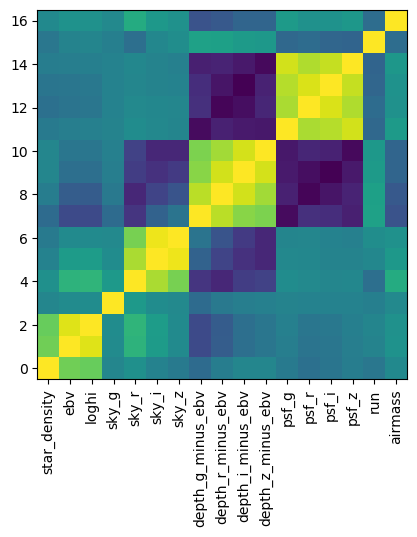

In [54]:
plt.imshow(corrm, origin='lower')
_=plt.xticks(x_, ut.maps_eboss_v7p2, rotation=90)

In [28]:
np.array(pcc_i[1]).shape

(10, 17)

In [19]:
len(pcc_m[1][0])

17

In [18]:
softplus = lambda x:np.log(1+np.exp(x))

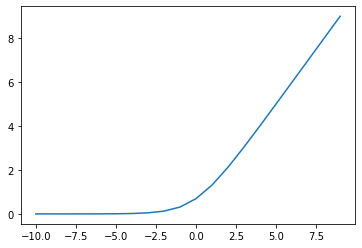

In [19]:
x = np.arange(-10, 10)
plt.plot(x, softplus(x))

In [20]:
softplus(x).min()

4.5398899216870535e-05

In [4]:
import LSSutils.utils as ut

In [5]:
from LSSutils import setup_logging

In [6]:
setup_logging('info')

In [7]:
cap = 'NGC'
zmin = 0.8
zmax = 3.5
dat = ut.EbossCat(f'/home/mehdi/data/eboss/data/v7_2/eBOSS_QSO_full_{cap}_v7_2.dat.fits', zmin=zmin, zmax=zmax)
ran = ut.EbossCat(f'/home/mehdi/data/eboss/data/v7_2/eBOSS_QSO_full_{cap}_v7_2.ran.fits', zmin=zmin, zmax=zmax, kind='randoms')

[ 000010.11 ]   0: 07-24 14:15  EbossCat        INFO     0.8 < z < 3.5
[ 000010.11 ]   0: 07-24 14:15  EbossCat        INFO     COMP_BOSS > 0.5
[ 000010.12 ]   0: 07-24 14:15  EbossCat        INFO     sector_SSR > 0.5
[ 000010.12 ]   0: 07-24 14:15  EbossCat        INFO     IMATCH = 1 or 2 for data
[ 000010.12 ]   0: 07-24 14:15  EbossCat        INFO     264888 (65.9%) data pass the cuts
[ 000010.88 ]   0: 07-24 14:15  EbossCat        WARNING  column QSO_ID not in the randoms file
[ 000010.89 ]   0: 07-24 14:15  EbossCat        WARNING  column IMATCH not in the randoms file
[ 000013.75 ]   0: 07-24 14:15  EbossCat        INFO     0.8 < z < 3.5
[ 000013.84 ]   0: 07-24 14:15  EbossCat        INFO     COMP_BOSS > 0.5
[ 000013.89 ]   0: 07-24 14:15  EbossCat        INFO     sector_SSR > 0.5
[ 000013.97 ]   0: 07-24 14:15  EbossCat        INFO     13475376 (78.2%) randoms pass the cuts


In [ ]:
ut.z_bins

In [68]:
d = ft.read('/home/mehdi/data/eboss/data/v7_2/0.7/pnll_nranexp/nn-weights.fits') # reproducible

In [69]:
d

array([(269276, [1.45883632, 1.36468399, 1.39188159, 1.3139056 , 1.32766879, 1.34456766, 1.35738039, 1.33355701, 1.35608244, 1.3459512 , 1.34048259, 1.52845454, 1.28647256, 1.44621325, 1.29131389, 1.41056502, 1.37112761, 1.39074695, 1.37681019, 1.39487791]),
       (532343, [1.54177594, 1.44992328, 1.46569586, 1.53127193, 1.5251267 , 1.55454707, 1.4497999 , 1.51439226, 1.50185263, 1.52332568, 1.42919266, 1.43323052, 1.47894359, 1.46318054, 1.58859026, 1.48703122, 1.47106433, 1.44342077, 1.48497999, 1.45033693]),
       (231314, [1.32088578, 1.24868238, 1.31971037, 1.24542582, 1.21416652, 1.27440536, 1.23745775, 1.18798292, 1.22872186, 1.17697096, 1.25610042, 1.13579273, 1.2920599 , 1.22201538, 1.12008846, 1.21562314, 1.05435729, 1.27457201, 1.2173028 , 1.09708226]),
       ...,
       (692333, [1.44743991, 1.51979208, 1.47101021, 1.42472517, 1.45499516, 1.45614624, 1.50961387, 1.3844372 , 1.50839627, 1.42257869, 1.42668009, 1.40982389, 1.50412393, 1.46442783, 1.42490005, 1.5196358 , 1.

In [116]:
rmse_512_old = np.load('/home/mehdi/data/formehdi/0.4/regression_decals_ccd/nn_plain_ccd_decals/raw/rank_0.npz', allow_pickle=True)

In [125]:
rmse_512_old['arr_0'].item()['epoch_MSEs'][0]

[0, 0.8875852, array([[  0.        ,   4.54706812,   4.51760864],
        [  1.        ,   1.38875246,   1.3948195 ],
        [  2.        ,   1.09614551,   1.09755385],
        [  3.        ,   1.01411533,   1.01488519],
        [  4.        ,   0.98042887,   0.98059398],
        [  5.        ,   0.9620409 ,   0.9618839 ],
        [  6.        ,   0.95047331,   0.95043963],
        [  7.        ,   0.94257534,   0.94306087],
        [  8.        ,   0.93683076,   0.93801707],
        [  9.        ,   0.93243194,   0.93438464],
        [ 10.        ,   0.92900109,   0.93166035],
        [ 11.        ,   0.92618418,   0.92946327],
        [ 12.        ,   0.92383337,   0.92762661],
        [ 13.        ,   0.92179728,   0.92597538],
        [ 14.        ,   0.9199872 ,   0.92451268],
        [ 15.        ,   0.91836286,   0.92326331],
        [ 16.        ,   0.91689706,   0.92208421],
        [ 17.        ,   0.91552204,   0.92092705],
        [ 18.        ,   0.91425776,   0.91993737]

(-0.28154706034656385, 0.2)

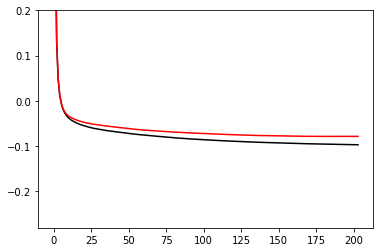

In [127]:
fig, ax = plt.subplots()
i = 0
for rmse_nside in [rmse_512_old]:
    
    rmse_nside_i = rmse_nside['arr_0'].item()['epoch_MSEs']
    base_train, base_val, base_test = rmse_nside['arr_0'].item()['options']['baselineMSE']

    ax.plot(rmse_nside_i[0][2][:, 0], rmse_nside_i[0][2][:, 1]-base_train, color='k', ls=ls[i])
    ax.plot(rmse_nside_i[0][2][:, 0], rmse_nside_i[0][2][:, 2]-base_val, color='r', ls=ls[i])
    
    i += 1
ax.set_ylim(ymax=0.2)

In [24]:
import matplotlib.pyplot as plt

In [80]:
rmse_256_old = np.load('/home/mehdi/data/eboss/data/v7_2/0.5/old/results/NGC_all_256/regression/nn_plain/raw/rank_0.npz', allow_pickle=True)
rmse_512_old = np.load('/home/mehdi/data/eboss/data/v7_2/0.3/old/results/NGC_all_512/regression/nn_plain/raw/rank_0.npz', allow_pickle=True)

[Text(0, 0.5, '$\\Delta$MSE [NN-baseline]'), Text(0.5, 0, 'Epoch')]

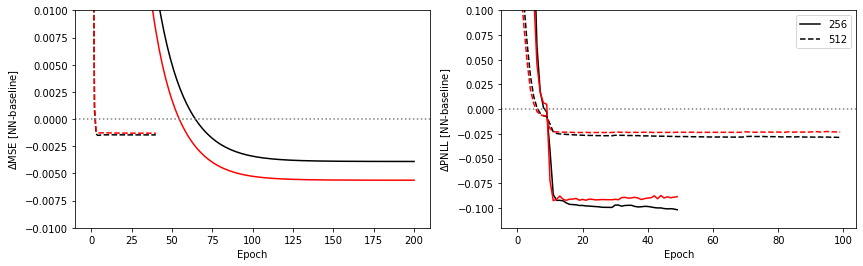

In [115]:
fig, (ax1, ax) = plt.subplots(ncols=2, figsize=(14, 4))

j = 0
ls = ['-', '--']
for nside in ['256', '512']:
    
    metrics = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/'\
                      +nside+'/main/nn_pnnl_all/metrics.npz', allow_pickle=True)
    
    taining_loss = metrics['losses'].item()['train']
    valid_loss = metrics['losses'].item()['valid']
    
    base_train_loss = metrics['stats'].item()[0]['base_train_loss']
    base_val_loss = metrics['stats'].item()[0]['base_val_loss']

    for i in range(1):
        ax.plot(np.array(taining_loss[0][i])-base_train_loss, color='k', ls=ls[j], label=nside)
        ax.plot(np.array(valid_loss[0][i])-base_val_loss, color='r', ls=ls[j])
    j += 1
ax.set_ylim(-0.12, 0.1)
ax.axhline(0, ls=':', color='grey')
ax.set(xlabel='Epoch', ylabel=r'$\Delta$PNLL [NN-baseline]')
ax.legend()


i = 0
ls = ['-', '--']

for rmse_nside in [rmse_256_old, rmse_512_old]:
    
    rmse_nside_i = rmse_nside['arr_0'].item()['epoch_MSEs']
    base_train, base_val, base_test = rmse_nside['arr_0'].item()['options']['baselineMSE']

    ax1.plot(rmse_nside_i[0][2][:, 0], rmse_nside_i[0][2][:, 1]-base_train, color='k', ls=ls[i])
    ax1.plot(rmse_nside_i[0][2][:, 0], rmse_nside_i[0][2][:, 2]-base_val, color='r', ls=ls[i])
    
    i += 1
    
ax1.set_ylim(-0.01, 0.01)
ax1.axhline(0, ls=':', color='grey')
ax1.set(xlabel='Epoch', ylabel=r'$\Delta$MSE [NN-baseline]')

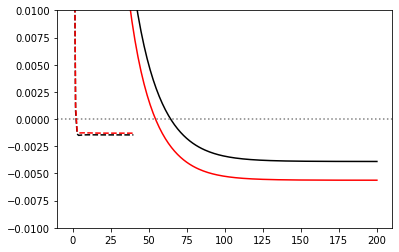

In [3]:



import pandas as pd

from LSSutils import setup_logging
from LSSutils.utils import EbossCat, HEALPixDataset

In [4]:
import healpy as hp
import numpy as np

In [5]:
setup_logging('info')

In [48]:
import fitsio as ft

In [49]:
df256 = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/256/main/ngal_eboss_main_256.fits')
df512 = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/main/ngal_eboss_main_512.fits')

In [106]:
df256['label'].sum()

218207.0

In [107]:
df512['label'].sum()

218199.0

In [50]:
from scipy.stats import poisson

In [28]:
#from scipy.special import factorial
#pdf = lambda k, mu: np.exp(-mu)*np.power(mu, k)/factorial(k)

Text(0, 0.5, 'Npix')

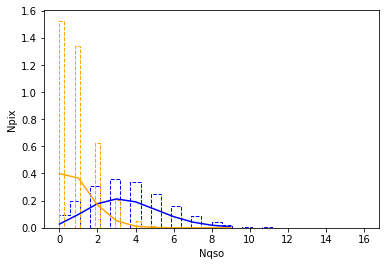

In [51]:
c = ['b', 'orange']
i = 0


for dfi in [df256, df512]:
    
    nbar = np.mean(dfi['label'])
    x_ = np.arange(0, 10)
    y_ = poisson.pmf(x_, nbar)
    
    plt.plot(x_, y_, color=c[i])
    plt.hist(dfi['label'], density=True, 
             histtype='step', bins=30, color=c[i], ls='--')
    
    i += 1
    
plt.xlabel('Nqso')
plt.ylabel('Npix')

In [9]:
dfold = ft.read('/home/mehdi/data/eboss/data/v7_2/0.7/eboss_ngal_nranexp_ngc_all_512.fits')

In [11]:
np.array_equal(dfold['label'], df512['label'])

True

In [6]:
templates = pd.read_hdf('/home/mehdi/data/templates/SDSS_WISE_HI_imageprop_nside512.h5', key='templates')  

[ 000003.31 ]   0: 07-22 17:19  numexpr.utils   INFO     Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[ 000003.31 ]   0: 07-22 17:19  numexpr.utils   INFO     NumExpr defaulting to 8 threads.


In [7]:
zmin = 0.8
zmax = 2.2
data = EbossCat('/home/mehdi/data/eboss/data/v7_2/eBOSS_QSO_full_NGC_v7_2.dat.fits', 
                kind='data', zmin=zmin, zmax=zmax)
randoms = EbossCat('/home/mehdi/data/eboss/data/v7_2/eBOSS_QSO_full_NGC_v7_2.ran.fits', 
                   kind='randoms', zmin=zmin, zmax=zmax)

[ 000006.92 ]   0: 07-22 17:19  EbossCat        INFO     0.8 < z < 2.2
[ 000006.93 ]   0: 07-22 17:19  EbossCat        INFO     COMP_BOSS > 0.5
[ 000006.93 ]   0: 07-22 17:19  EbossCat        INFO     sector_SSR > 0.5
[ 000006.94 ]   0: 07-22 17:19  EbossCat        INFO     IMATCH = 1 or 2 for data
[ 000006.94 ]   0: 07-22 17:19  EbossCat        INFO     218209 (54.3%) data pass the cuts
[ 000007.66 ]   0: 07-22 17:19  EbossCat        WARNING  column QSO_ID not in the randoms file
[ 000007.66 ]   0: 07-22 17:19  EbossCat        WARNING  column IMATCH not in the randoms file
[ 000009.75 ]   0: 07-22 17:19  EbossCat        INFO     0.8 < z < 2.2
[ 000009.81 ]   0: 07-22 17:19  EbossCat        INFO     COMP_BOSS > 0.5
[ 000009.85 ]   0: 07-22 17:19  EbossCat        INFO     sector_SSR > 0.5
[ 000009.91 ]   0: 07-22 17:19  EbossCat        INFO     11099858 (64.4%) randoms pass the cuts


In [17]:
columns = [
    'star_density', 'ebv', 'loghi',
    'sky_g', 'sky_r', 'sky_i', 'sky_z',
    'depth_g_minus_ebv','depth_r_minus_ebv', 'depth_i_minus_ebv', 'depth_z_minus_ebv', 
    'psf_g', 'psf_r', 'psf_i', 'psf_z',
     'run', 'airmass'
]

In [9]:
dataset = HEALPixDataset(data, randoms, templates, columns)

[ 000125.54 ]   0: 07-22 17:21  HEALPixDataset  INFO     824348 pixels (26.2%) have imaging


In [11]:
zmin = 0.8
zmax = 2.2
nside = 512
ngc_all = dataset.prepare(nside, zmin, zmax, label='nnbar')

[ 000420.63 ]   0: 07-22 17:26  EbossCat        INFO     raw: 1
[ 000420.68 ]   0: 07-22 17:26  EbossCat        INFO     Projecting data  to HEALPix with 512
[ 000420.69 ]   0: 07-22 17:26  EbossCat        INFO     218209 (100.0%) data pass (0.8 < z < 2.2)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
[ 000420.72 ]   0: 07-22 17:26  EbossCat        INFO     raw: 1
[ 000420.83 ]   0: 07-22 17:26  EbossCat        INFO     Projecting randoms  to HEALPix with 512
[ 000420.90 ]   0: 07-22 17:26  EbossCat        INFO     11099858 (100.0%) randoms pass (0.8 < z < 2.2)
[ 000421.77 ]   0: 07-22 17:26  HEALPixDataset  INFO     using 41.319270925942085 as nran_exp
[ 000421.80 ]   0: 07-22 17:26  HEALPixDataset  INFO     237681 pixels (7.6%) have imaging


In [12]:
dt = ft.read('/home/mehdi/data/eboss/data/v7_2/0.3/old/ngal_features_NGC_all_512.fits')

In [13]:
dt

array([(0.,  209767, [2.29844797e+01, 2.70000000e+01, 4.56774577e-02, 1.64563285e+00, 4.35553703e+00, 8.11824129e+00, 2.46633346e+01, 5.42462906e-01, 7.63981402e-01, 4.63520126e+00, 1.12740368e+00, 1.59946952e+00, 1.36571191e+00, 1.26126266e+00, 1.33097938e+00, 2.54689527e+00, 3.09049473e+01, 2.05252472e+01, 4.27784619e+03, 1.25275267e+00], 0.08608502),
       (0.,  209768, [2.30220759e+01, 2.72500000e+01, 4.17752427e-02, 1.74805319e+00, 5.13403797e+00, 1.02541981e+01, 3.33778648e+01, 5.29596031e-01, 7.84731984e-01, 5.56986237e+00, 1.20749402e+00, 1.52491856e+00, 1.28709328e+00, 1.18848932e+00, 1.35732150e+00, 2.54473405e+00, 3.09237691e+01, 2.05149867e+01, 4.29400000e+03, 1.19661844e+00], 0.06452741),
       (0.,  209769, [2.29871362e+01, 2.72500000e+01, 4.28773537e-02, 1.59663048e+00, 3.85639412e+00, 7.00525618e+00, 1.93599201e+01, 5.45943154e-01, 7.71337493e-01, 4.52831631e+00, 1.14290294e+00, 1.62360568e+00, 1.45626734e+00, 1.36961410e+00, 1.46742868e+00, 2.50799325e+00, 3.12437416

In [16]:
np.array_equiv(ngc_all['label'][dt['label']!=0], dt['label'][dt['label']!=0])

True

In [10]:
help(dataset.prepare)

Help on method prepare in module LSSutils.utils:

prepare(nside, zmin, zmax, label='nnbar', frac_min=0, nran_exp=None) method of LSSutils.utils.HEALPixDataset instance



In [ ]:

# nnbarall = dataset.prepare(512, 0.8, 2.2, label='nnbar')
ngcall = dataset.prepare(512, 0.8, 2.2, label='ngal')
ngcall_nranexp = dataset.prepare(512, 0.8, 2.2, label='ngal', nran_exp=65.)

In [5]:
def radec2thphi(ra, dec):
    return np.radians(90 - dec), np.radians(ra)

In [6]:
from tqdm import tqdm_notebook as tqdm

In [7]:
from astropy.table import Table

In [11]:
def mksysmap(res=512):
    npix = 12*res*res
    nrl = np.zeros((npix)) #number of randoms in pixel
    sky_g = np.zeros((npix))
    sky_r = np.zeros((npix))
    sky_i = np.zeros((npix))
    sky_z = np.zeros((npix))
    airmass = np.zeros((npix))
    EBV = np.zeros((npix))
    depth_g = np.zeros((npix))
    depth_r = np.zeros((npix))
    depth_i = np.zeros((npix))
    depth_z = np.zeros((npix))
    psf_g = np.zeros((npix))
    psf_r = np.zeros((npix))
    psf_i = np.zeros((npix))
    psf_z = np.zeros((npix))
    f = ft.read('/home/mehdi/data/templates/eBOSSrandoms.ran.fits')   
    print(f.size)
    for i in tqdm(range(0, len(f))):
        th,phi = radec2thphi(f[i]['RA'],f[i]['DEC'])
        pix = hp.ang2pix(res,th,phi)
        nrl[pix] += 1.
        sky_g[pix] += f[i]['SKYFLUX'][1]
        sky_r[pix] += f[i]['SKYFLUX'][2]
        sky_i[pix] += f[i]['SKYFLUX'][3]
        sky_z[pix] += f[i]['SKYFLUX'][4]
        airmass[pix] += f[i]['AIRMASS']
        EBV[pix] += f[i]['EB_MINUS_V']
        depth_g[pix] += f[i]['IMAGE_DEPTH'][1]
        depth_r[pix] += f[i]['IMAGE_DEPTH'][2]
        depth_i[pix] += f[i]['IMAGE_DEPTH'][3]
        depth_z[pix] += f[i]['IMAGE_DEPTH'][4]
        psf_g[pix] += f[i]['PSF_FWHM'][1]
        psf_r[pix] += f[i]['PSF_FWHM'][2]
        psf_i[pix] += f[i]['PSF_FWHM'][3]
        psf_z[pix] += f[i]['PSF_FWHM'][4]
    sky_g /= nrl
    sky_r /= nrl
    sky_i /= nrl
    sky_z /= nrl
    airmass /= nrl
    EBV /= nrl
    depth_g /= nrl
    depth_r /= nrl
    depth_z /= nrl
    depth_i /= nrl
    psf_g /= nrl
    psf_r /= nrl
    psf_i /= nrl
    psf_z /= nrl
    to = Table([nrl,sky_g,sky_r,sky_i,sky_z,airmass,EBV,depth_g,depth_r,depth_i,depth_z,psf_g,psf_r,psf_i,psf_z],names=('NRAN','SKY_G','SKY_R','SKY_I','SKY_Z','AIRMASS','EBV','DEPTH_G','DEPTH_R','DEPTH_I','DEPTH_Z','PSF_G','PSF_R','PSF_I','PSF_Z'))   
    return to

In [12]:
templates_orgv2 = mksysmap(512)

15324690


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encounte

In [15]:
good = np.isfinite(templates_orgv2['DEPTH_I'])

In [24]:
for column in templates_orgv2.colnames:
    if column.lower() in templates.columns:
        good = np.isfinite(templates_orgv2[column])
        print(column, np.array_equal(templates_orgv2[column][good], templates_org[column][good]))

SKY_G True
SKY_R True
SKY_I True
SKY_Z True
AIRMASS True
EBV True
DEPTH_G True
DEPTH_R True
DEPTH_I False
DEPTH_Z False
PSF_G True
PSF_R True
PSF_I True
PSF_Z True


In [ ]:
my_tem

In [25]:
from LSSutils.utils import make_sysmaps

In [26]:
from time import time

In [28]:
t0 = time()
ran = ft.read('/home/mehdi/data/templates/eBOSSrandoms.ran.fits', lower=True)
templatesv2 = make_sysmaps(ran, '/home/mehdi/data/templates/NHI_HPX.fits', '/home/mehdi/data/templates/allstars17.519.9Healpixall256.dat', nside=512)
t1 = time()
t1 - t0

...............

/home/mehdi/github/LSSutils/LSSutils/extrn/GalacticForegrounds/hpmaps.py:86: UserWarning: upgrading/downgrading HI column density
  if nside!= nside_in:warnings.warn('upgrading/downgrading HI column density')
/home/mehdi/github/LSSutils/LSSutils/extrn/GalacticForegrounds/hpmaps.py:96: RuntimeWarning: invalid value encountered in log10
  self.loghi    = np.log10(nhi_c)
/home/mehdi/github/LSSutils/LSSutils/extrn/GalacticForegrounds/hpmaps.py:29: UserWarning: upgrading/downgrading SDSS star density
  warnings.warn('upgrading/downgrading SDSS star density')
/home/mehdi/github/LSSutils/LSSutils/utils.py:453: RuntimeWarning: invalid value encountered in arcsinh
  mag = -2.5/np.log(10.)*(np.arcsinh((flux/1.e9)/(2*b)) + np.log(b))


119.48541831970215

In [35]:
for column in templates_orgv2.colnames:
    if column.lower() in templatesv2.columns:
        good = np.isfinite(templates_orgv2[column])
        print(column, np.array_equal(templates_orgv2[column][good], templatesv2[column.lower()][good]))

SKY_G True
SKY_R True
SKY_I True
SKY_Z True
AIRMASS True
EBV True
DEPTH_G True
DEPTH_R True
DEPTH_I True
DEPTH_Z True
PSF_G True
PSF_R True
PSF_I True
PSF_Z True


In [30]:
templates_org = ft.read('/home/mehdi/data/templates/SDSS_WISE_imageprop_nside512.fits')

In [11]:
import numpy as np

In [12]:
good = np.isfinite(templates_org['DEPTH_I'])

(array([3.04000e+02, 1.37310e+04, 3.11708e+05, 4.42225e+05, 5.34450e+04,
        2.56300e+03, 3.23000e+02, 4.20000e+01, 5.00000e+00, 2.00000e+00]),
 array([2.03257047, 2.6665833 , 3.30059613, 3.93460897, 4.5686218 ,
        5.20263464, 5.83664747, 6.4706603 , 7.10467314, 7.73868597,
        8.37269881]),
 <a list of 10 Patch objects>)

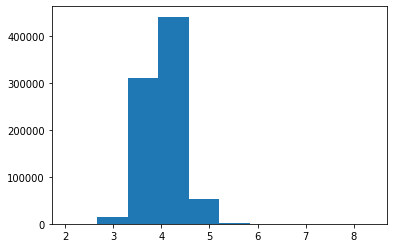

In [26]:
plt.hist(templatesv2['depth_z'][good].values/templates_org['DEPTH_Z'][good])

In [27]:
templates_org['DEPTH_Z'][good], templatesv2['depth_z'][good].values

(array([1.35519111, 1.35519111, 1.05819595, ..., 1.39357495, 1.5615294 ,
        1.61801052]),
 array([5.61748362, 5.61748362, 3.77629113, ..., 6.00795889, 6.7824626 ,
        6.62022066]))

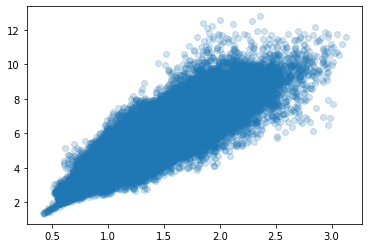

In [19]:
plt.scatter(templates_org['DEPTH_Z'][good], templates['depth_z'][good].values, alpha=0.2)

In [6]:
from LSSutils.utils import mask2regions

In [3]:
import healpy as hp

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [5]:
import numpy as np

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


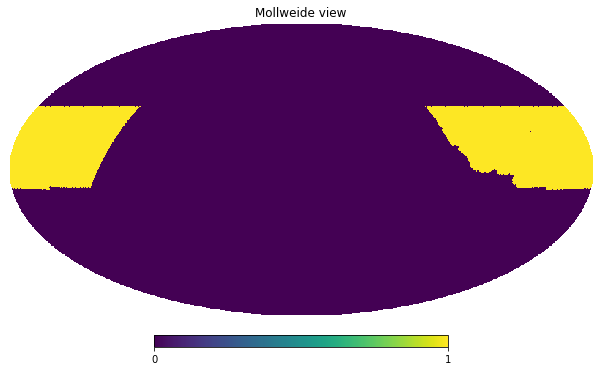

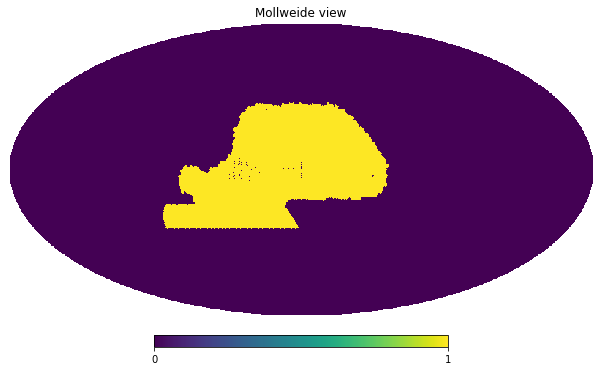

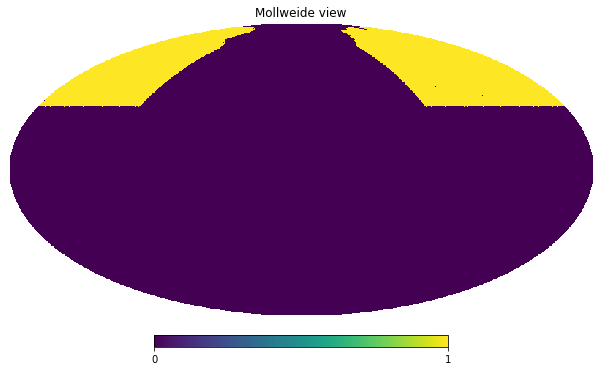

In [2]:
import pandas as pd

In [3]:
from LSSutils.utils import corrmatrix

In [4]:
df = pd.read_hdf('/home/mehdi/data/templates/SDSS_WISE_HI_imageprop_nside512.h5', key='templates')
df.dropna(inplace=True)
corr = corrmatrix(df.values)

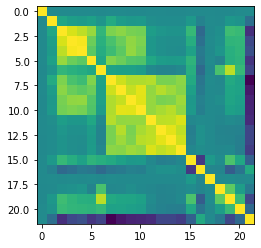

In [5]:
plt.imshow(corr)

In [11]:
import numpy as np

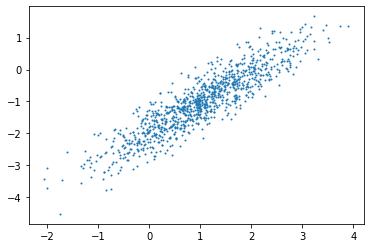

In [38]:
plt.scatter(x[:, 0], x[:, 1], 1)

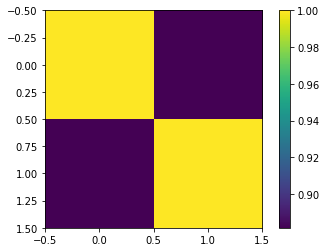

In [33]:
plt.imshow(corr)
plt.colorbar()

In [25]:
2

2

In [1]:
from abc import ABC, abstractmethod
from astropy.table import Table
import logging

In [ ]:
class Catalog(object):
    
    def __init__(self, filename):
        self.data = self.read(filename)
        
    def read(self, filename):
        if filename.endswith('.fits'):
            self.data  = Table.read(filename)
        else:
            raise NotImplementedError(f'file {filename} not implemented')

In [ ]:
class EbossCatalog:
    
    logger = logging.getLogger('EbossCatalog')
    
    columns = ['RA', 'DEC', 'Z', 
               'WEIGHT_FKP', 'WEIGHT_SYSTOT', 'WEIGHT_CP',
               'WEIGHT_NOZ', 'NZ', 'QSO_ID', 'IMATCH',
               'COMP_BOSS', 'sector_SSR']    
    comp_min = 0.5
    
    def __init__(self, filename, kind='galaxy', **clean_kwargs):
        self.kind  = kind
        self.read(filename)
        self.clean(**clean_kwargs)
        
    def read(self, filename):
        if filename.endswith('.fits'):
            self.data  = Table.read(filename)
        else:
            raise NotImplementedError(f'file {filename} not implemented')
    
    def clean(self, zmin=0.8, zmax=2.2):
        ''' `Full` to `Clustering` Catalog
        '''           
        columns = []
        for i, column in enumerate(self.columns):
            if column not in self.data.columns:
                self.logger.warning(f'column {column} not in the {self.kind} file')
            else:
                columns.append(column)
                
        self.columns = columns
        self.data  = self.data[self.columns]        
        
        #-- apply cuts on galaxy or randoms
        good = (self.data['Z'] > zmin) & (self.data['Z'] < zmax)
        self.logger.info(f'{zmin} < z < {zmax}')
        for column in ['COMP_BOSS', 'sector_SSR']:
            if column in self.data.columns:                
                good &= self.data[column] > self.comp_min
                self.logger.info(f'{column} > {self.comp_min}')
                
        if self.kind=='galaxy':
            if 'IMATCH' in self.data.columns:
                good &= (self.data['IMATCH']==1) | (self.data['IMATCH']==2)
                self.logger.info(f'IMATCH = 1 or 2 for {self.kind}')
                                
        self.logger.info(f'{good.sum()} ({100*good.mean():3.1f}%) {self.kind} pass the cuts')
        self.data = self.data[good]
        
    def prepare_weights(self, raw=0):        
        self.logger.info(f'raw: {raw}')        
        
        if raw==1:                        
            if self.kind == 'galaxy':
                self.data['WEIGHT'] = self.data['WEIGHT_FKP']
                self.data['WEIGHT'] *= self.data['WEIGHT_CP']
                self.data['WEIGHT'] *= self.data['WEIGHT_NOZ']
                
            elif self.kind == 'random':                
                self.data['WEIGHT'] = self.data['WEIGHT_FKP']
                self.data['WEIGHT'] *= self.data['COMP_BOSS']
                
            else:
                raise ValueError(f'{self.kind} not defined')
                
        elif raw==2:
            # data and randoms both are weighted by CP x FKP x NOZ x SYSTOT
            self.data['WEIGHT'] = self.data['WEIGHT_FKP']
            self.data['WEIGHT'] *= self.data['WEIGHT_CP']            
            self.data['WEIGHT'] *= self.data['WEIGHT_NOZ']
            self.data['WEIGHT'] *= self.data['WEIGHT_SYSTOT']
        elif raw==0:
            self.data['WEIGHT'] = 1.0
        else:
            raise ValueError(f'{raw} should be 0, 1, or 2!')
            
    def tohp(self, nside, zmin, zmax, raw=0): 
        self.prepare_weights(raw=raw)
        assert 'WEIGHT' in self.data.columns, "run `self.prepare_weights'"
        self.logger.info(f'Projecting {self.kind}  to HEALPix with {nside}')
        good = (self.data['Z'] > zmin) & (self.data['Z'] < zmax)
        self.logger.info((f'{good.sum()} ({100*good.mean():3.1f}%)'
                          f' {self.kind} pass ({zmin:.1f} < z < {zmax:.1f})'))
        
        return hpixsum(nside, 
                       self.data['RA'][good], 
                       self.data['DEC'][good], 
                       weights=self.data['WEIGHT'][good])
    
    def __getitem__(self, index):
        return self.data[index]